<a href="https://colab.research.google.com/github/Zian7404/Machine-Learning/blob/main/Heart_Disease_Prediction_using_NN_CA_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 1.26.4
Sklearn: 1.5.2
Matplotlib: 3.7.1
Keras: 3.4.1


In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [ ]:
# read the csv
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
print( 'Shape of DataFrame: {}'.format(df.shape))

Shape of DataFrame: (1025, 14)


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# About the Datset

In [ ]:
# Check for null values in each column
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe(include='all')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


target
1    526
0    499
Name: count, dtype: int64


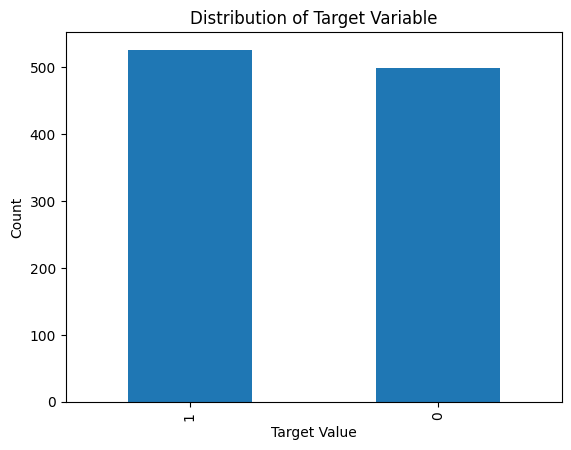

In [ ]:
print(df['target'].value_counts())

# Plot a bar graph of the target column distribution
df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Based on the data types and the feature explanations we had earlier, we can see that **9 columns** (sex, cp, fbs, restecg, exang, slope, ca, thal, and target) are indeed **numerical in terms of data type, but categorical in terms of their semantics**. These features should be converted to string (object) data type for proper analysis and interpretation:

In [ ]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

categorical_columns = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[categorical_columns] = df[categorical_columns].astype('object')

print(df.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object


Statistical Description of Numerical Features

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


Summary of Categorical Features

In [ ]:
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,1025,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,1,0,2,1
freq,713,497,872,513,680,482,578,544,526


# EDA

In [ ]:
data=df

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

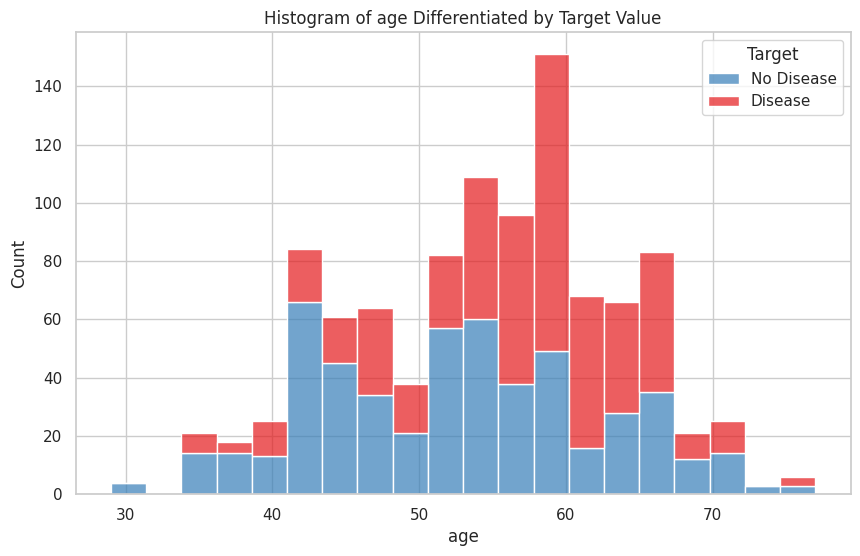

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

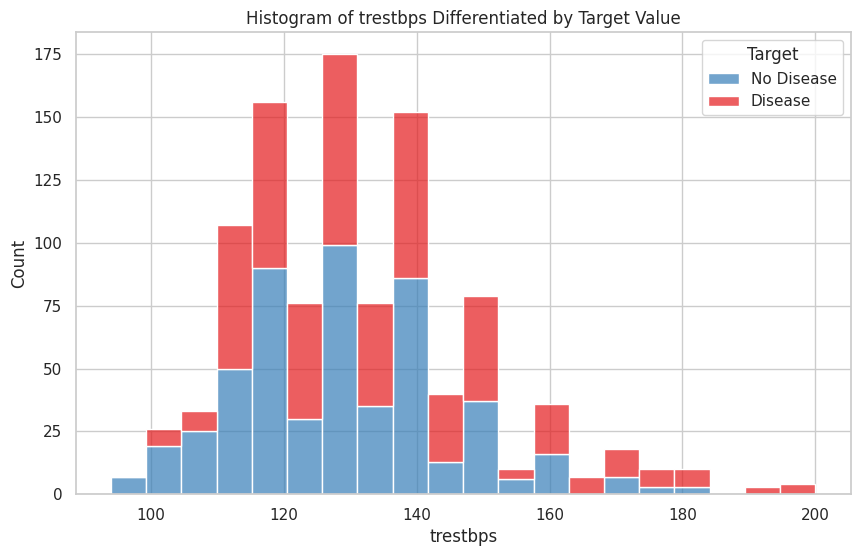

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

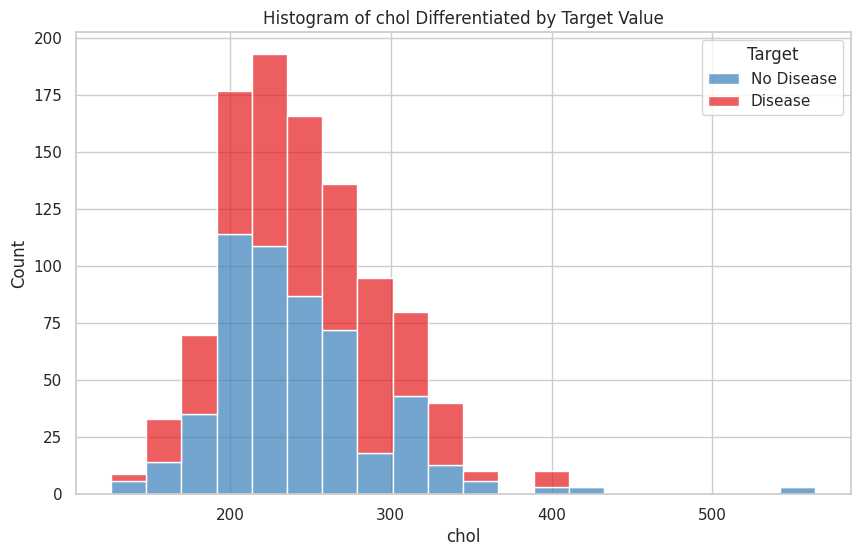

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

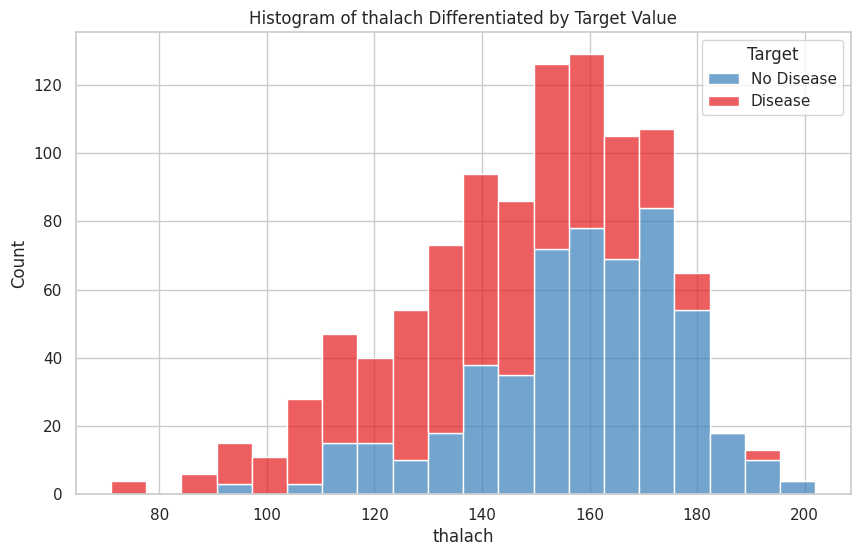

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

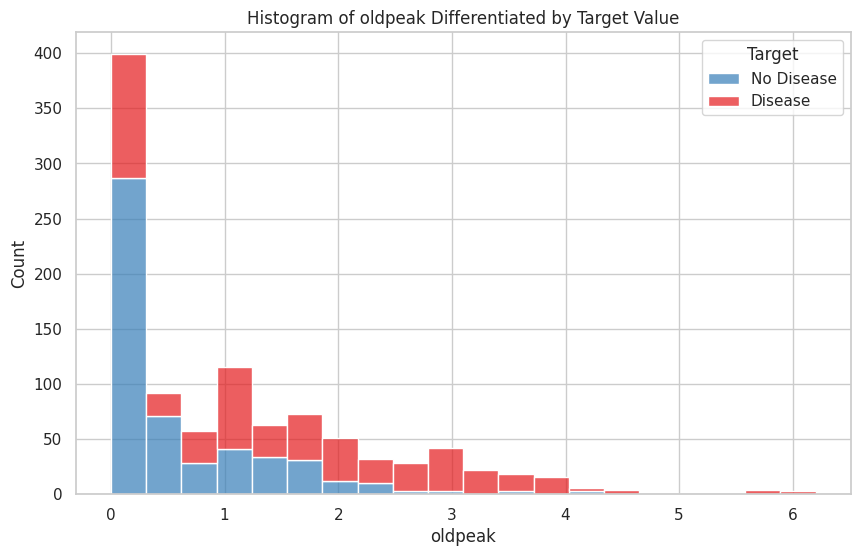

In [ ]:
# Set the style
sns.set(style="whitegrid")

numeric_columns = continuous_features

# Create histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, hue='target', multiple='stack', bins=20, palette='Set1', alpha=0.7)

    # Adding titles and labels
    plt.title(f'Histogram of {column} Differentiated by Target Value')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['No Disease', 'Disease'])

    # Show the plot
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

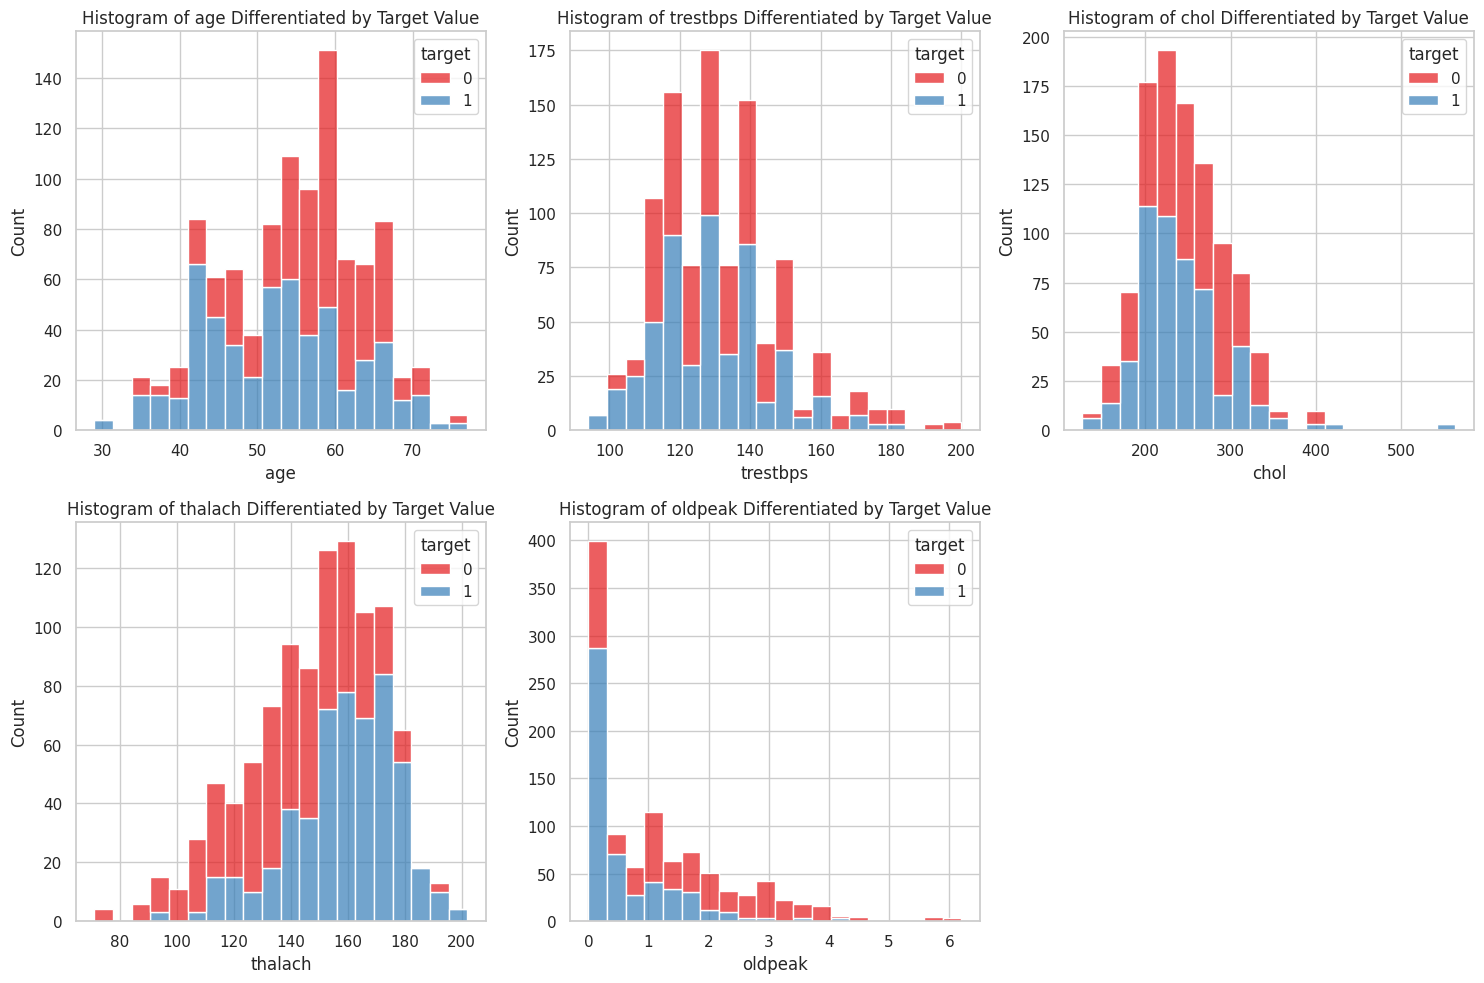

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes for easy indexing
axes = axes.flatten()

# Loop through each column and plot the histogram
for i, column in enumerate(numeric_columns):
    sns.histplot(data=data, x=column, hue='target', multiple='stack', bins=20, palette='Set1', alpha=0.7, ax=axes[i])

    # Adding titles and labels
    axes[i].set_title(f'Histogram of {column} Differentiated by Target Value')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove the last empty subplot if the number of columns is not a multiple of 6
fig.delaxes(axes[-1])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-17-126a314966cb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_percent.index, y=category_percent.values, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-17-126a314966cb>:17: FutureWarning: 

Passing `palette` without as

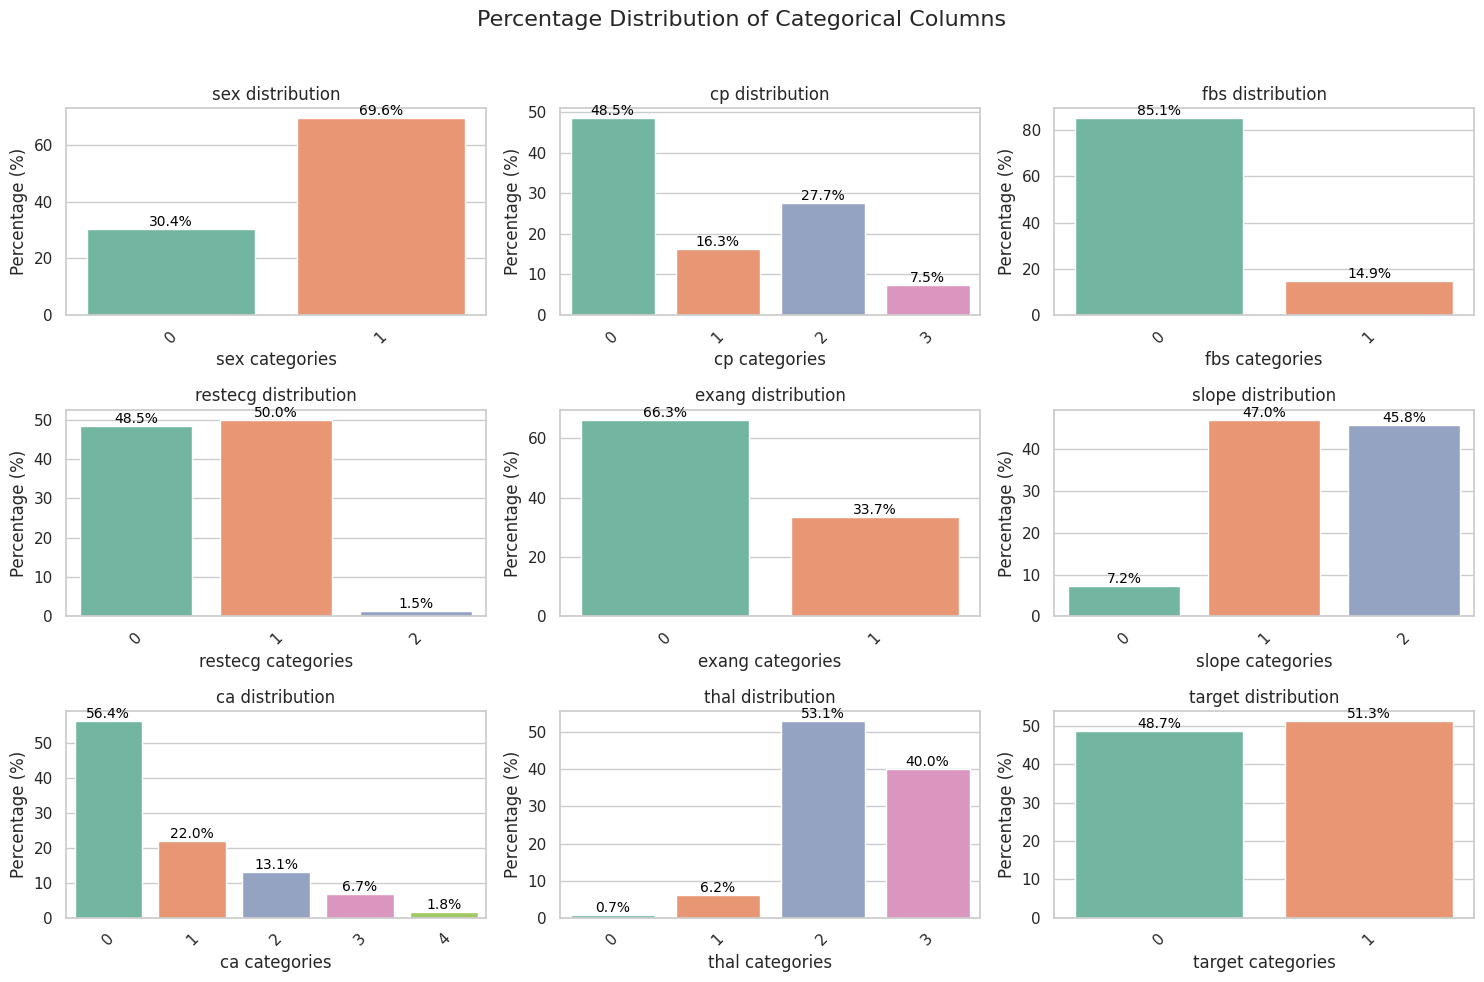

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting grid
plt.figure(figsize=(15, 10))
plt.suptitle('Percentage Distribution of Categorical Columns', fontsize=16)

# Loop through the categorical columns and create a bar plot for each
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)

    # Calculate percentage distribution
    category_percent = (df[col].value_counts(normalize=True) * 100).sort_index()

    # Plot using seaborn
    ax = sns.barplot(x=category_percent.index, y=category_percent.values, palette='Set2')

    plt.title(f'{col} distribution')
    plt.ylabel('Percentage (%)')
    plt.xlabel(f'{col} categories')
    plt.xticks(rotation=45)

    # Add percentage labels on top of each bar
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


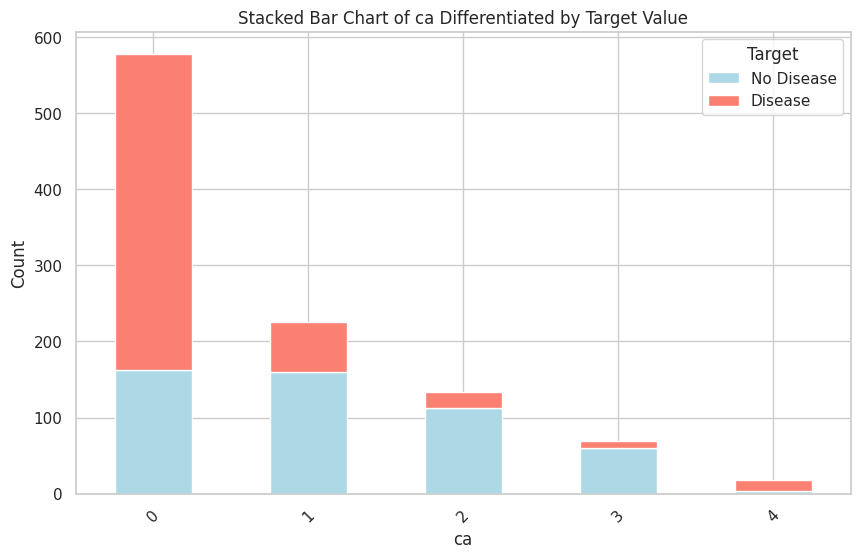

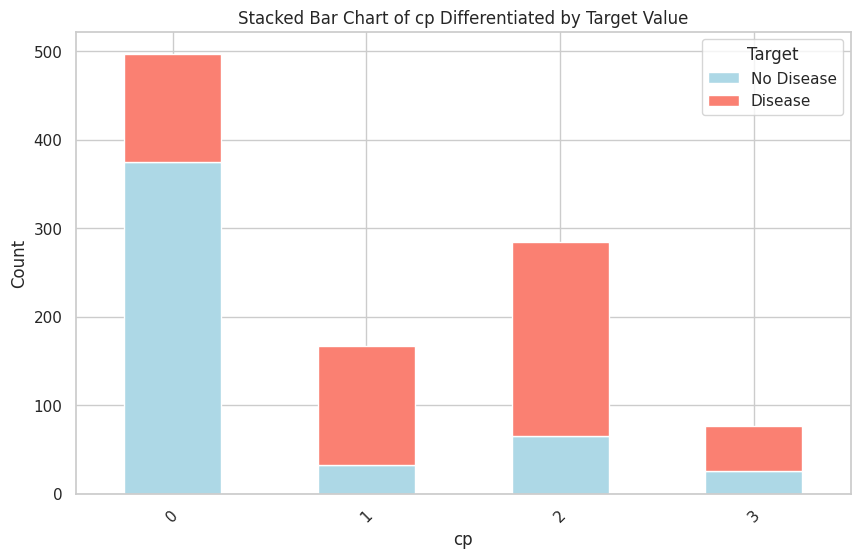

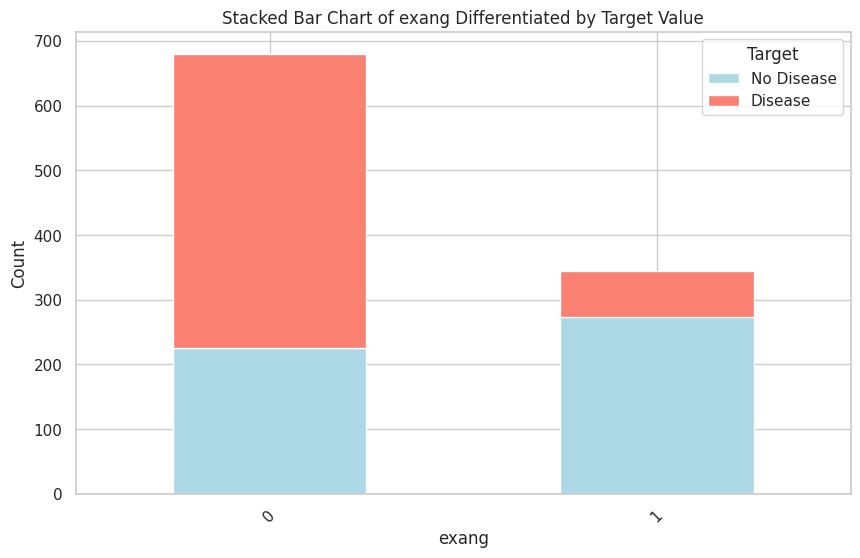

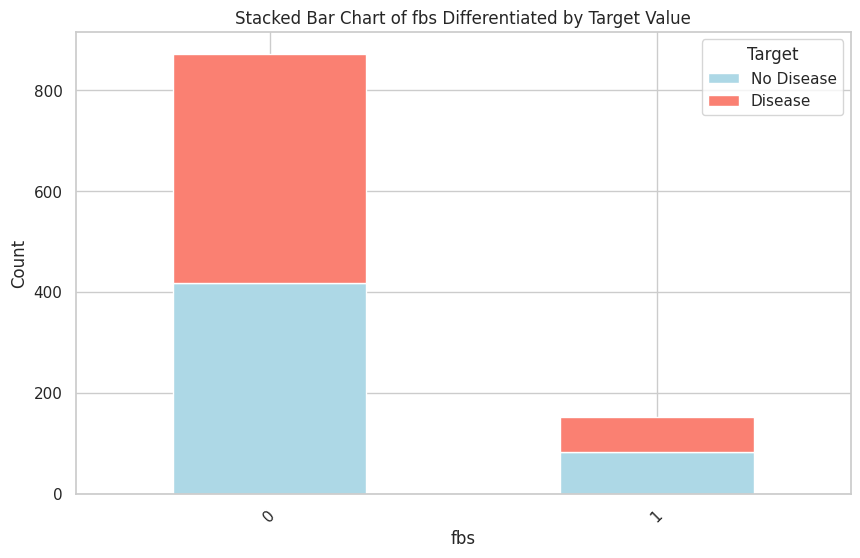

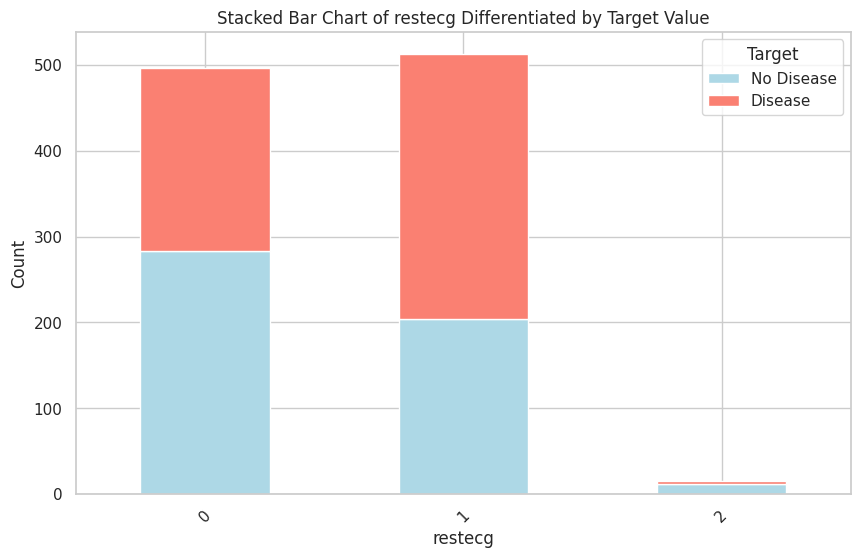

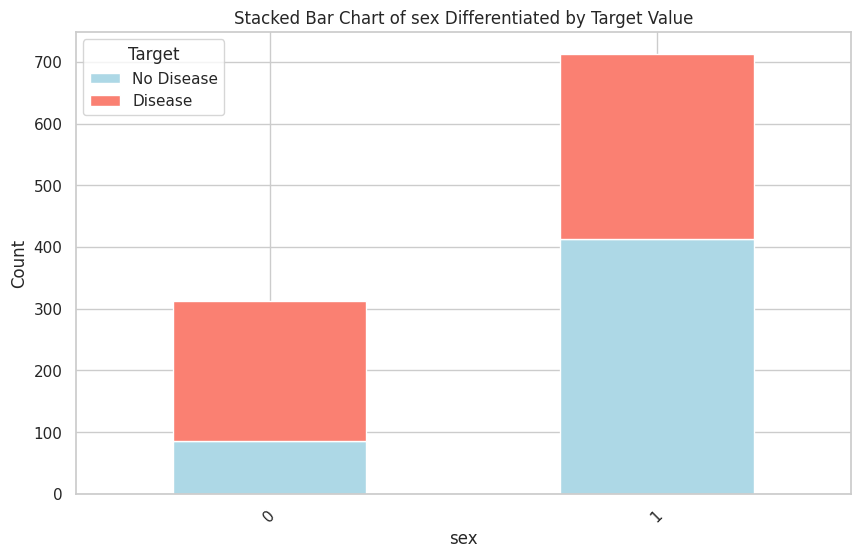

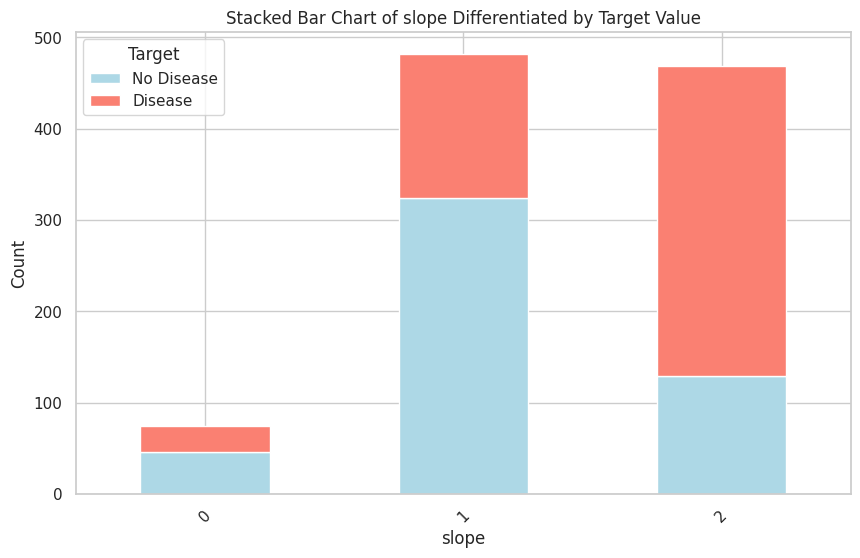

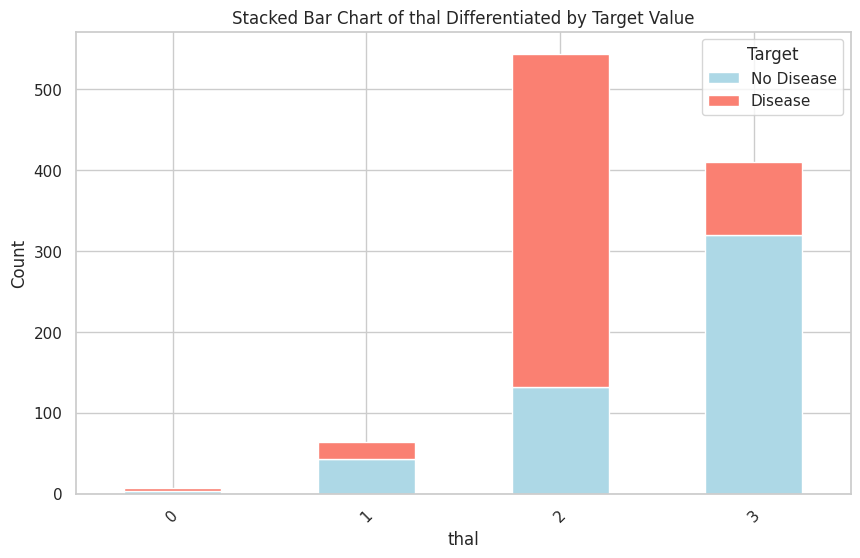

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_columns = ['ca', 'cp', 'exang', 'fbs', 'restecg', 'sex', 'slope', 'thal']

# Set the style
sns.set(style="whitegrid")

# Create stacked bar charts for each categorical column
for column in categorical_columns:
    # Calculate counts of each category for both target values
    count_data = df.groupby([column, 'target']).size().unstack(fill_value=0)

    # Plotting
    count_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])

    # Adding titles and labels
    plt.title(f'Stacked Bar Chart of {column} Differentiated by Target Value')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Target', labels=['No Disease', 'Disease'])

    # Show the plot
    plt.show()


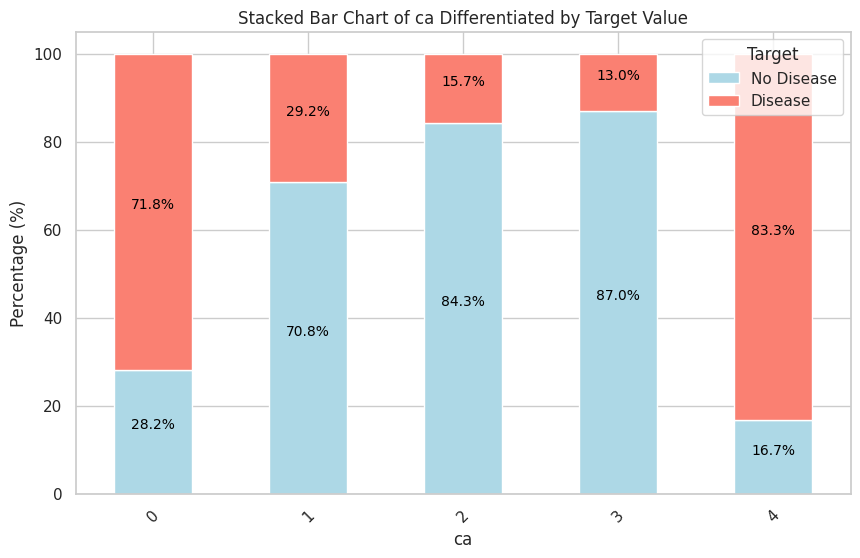

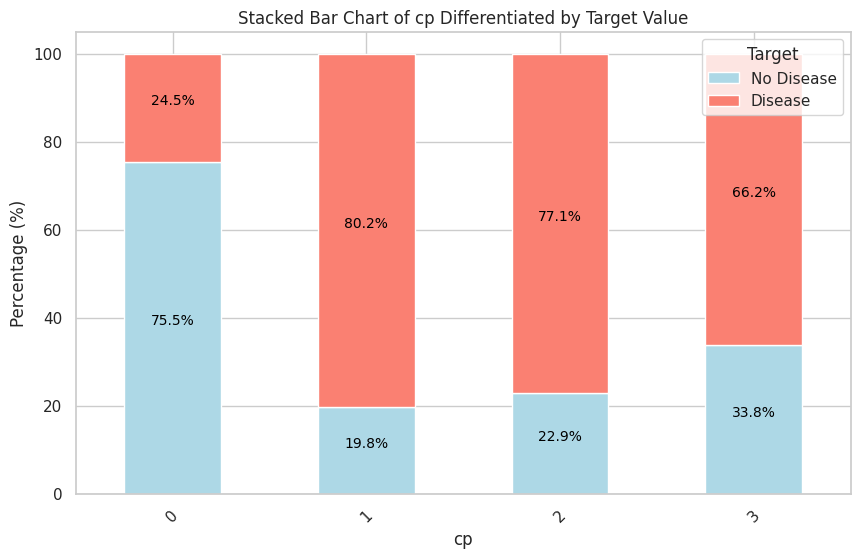

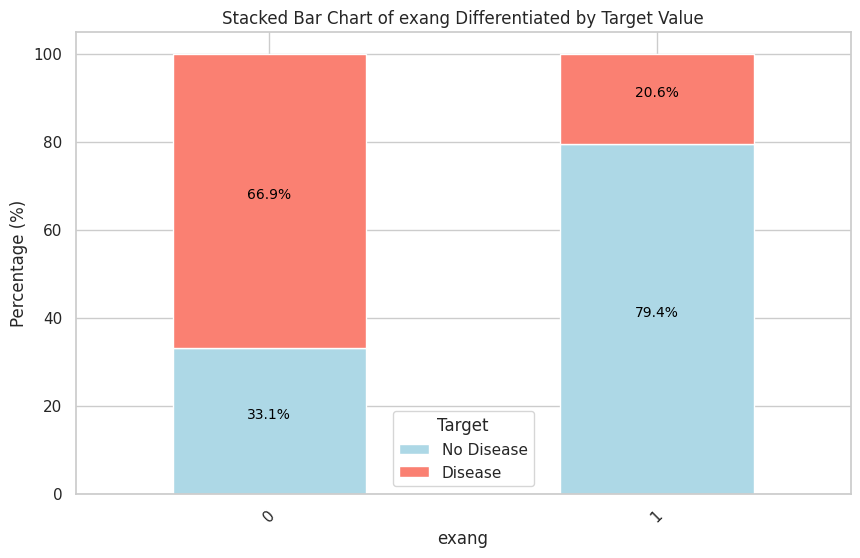

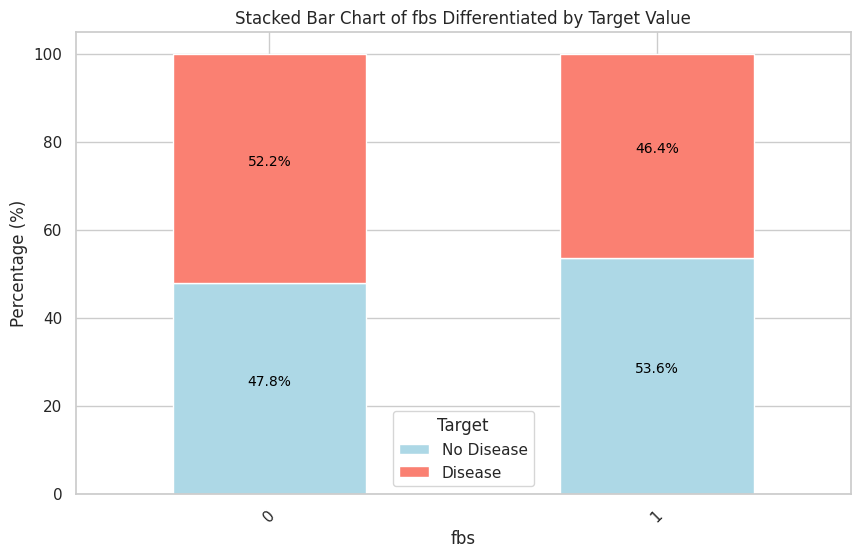

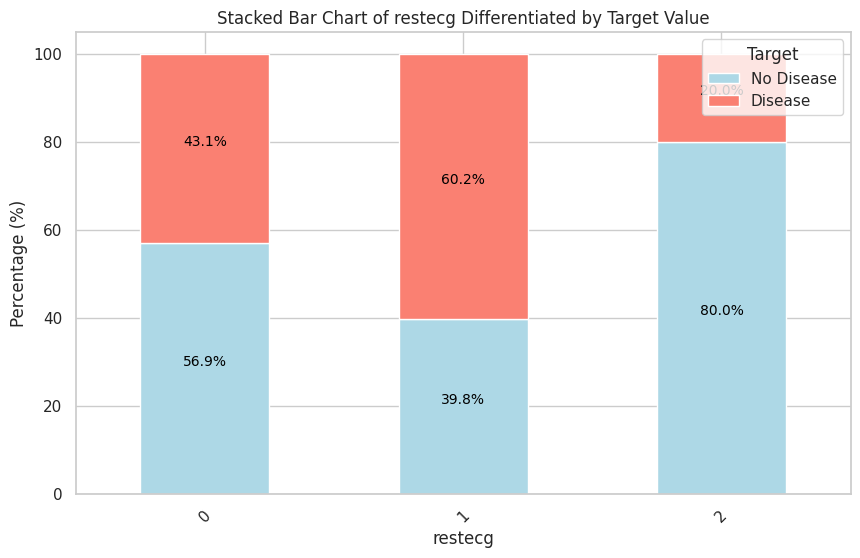

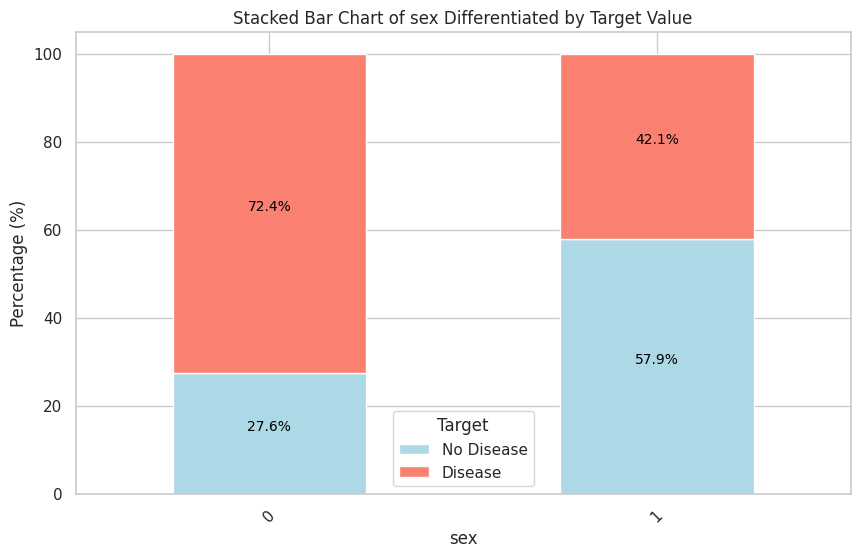

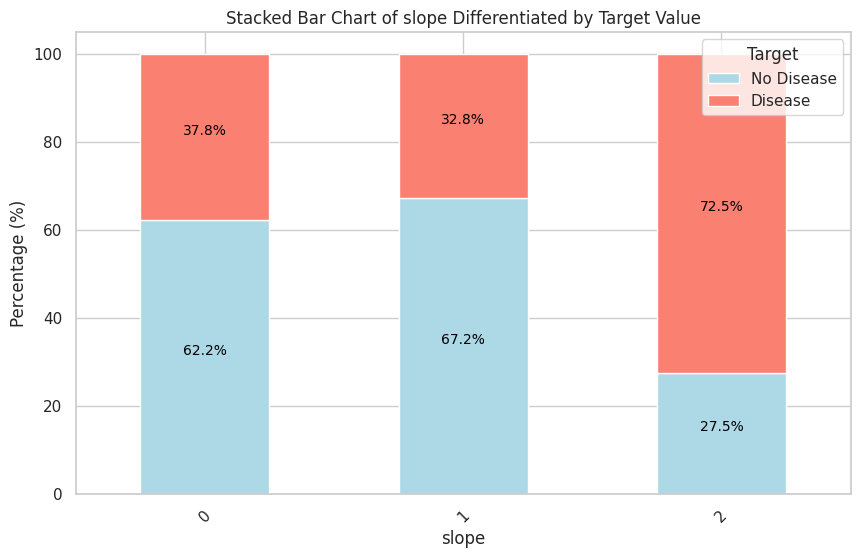

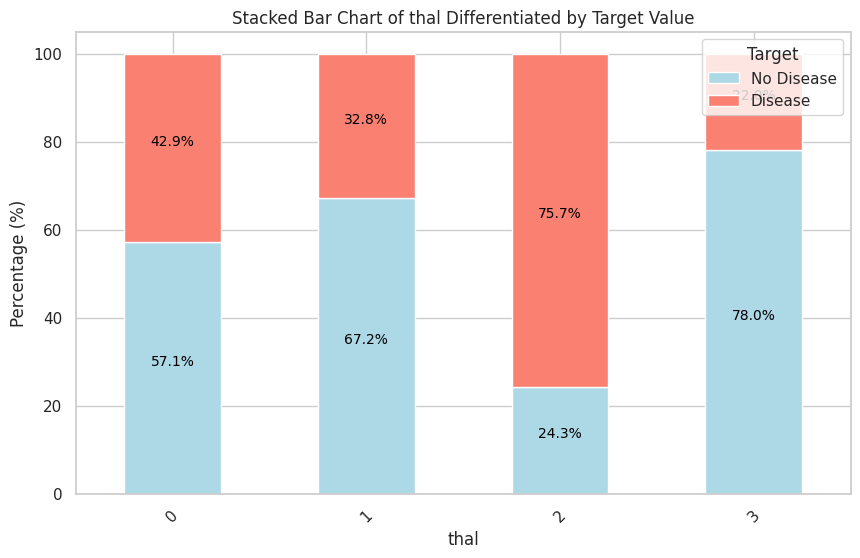

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_columns = ['ca', 'cp', 'exang', 'fbs', 'restecg', 'sex', 'slope', 'thal']

sns.set(style="whitegrid")

# Create stacked bar charts for each categorical column
for column in categorical_columns:
    # Calculate counts of each category for both target values
    count_data = df.groupby([column, 'target']).size().unstack(fill_value=0)

    # Calculate percentages
    percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

    # Plotting
    ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])

    # Adding titles and labels
    plt.title(f'Stacked Bar Chart of {column} Differentiated by Target Value')
    plt.xlabel(column)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Target', labels=['No Disease', 'Disease'])

    # Annotate percentages on the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate if the height is greater than zero
            ax.annotate(f'{height:.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_y() + height / 2),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

    # Show the plot
    plt.show()


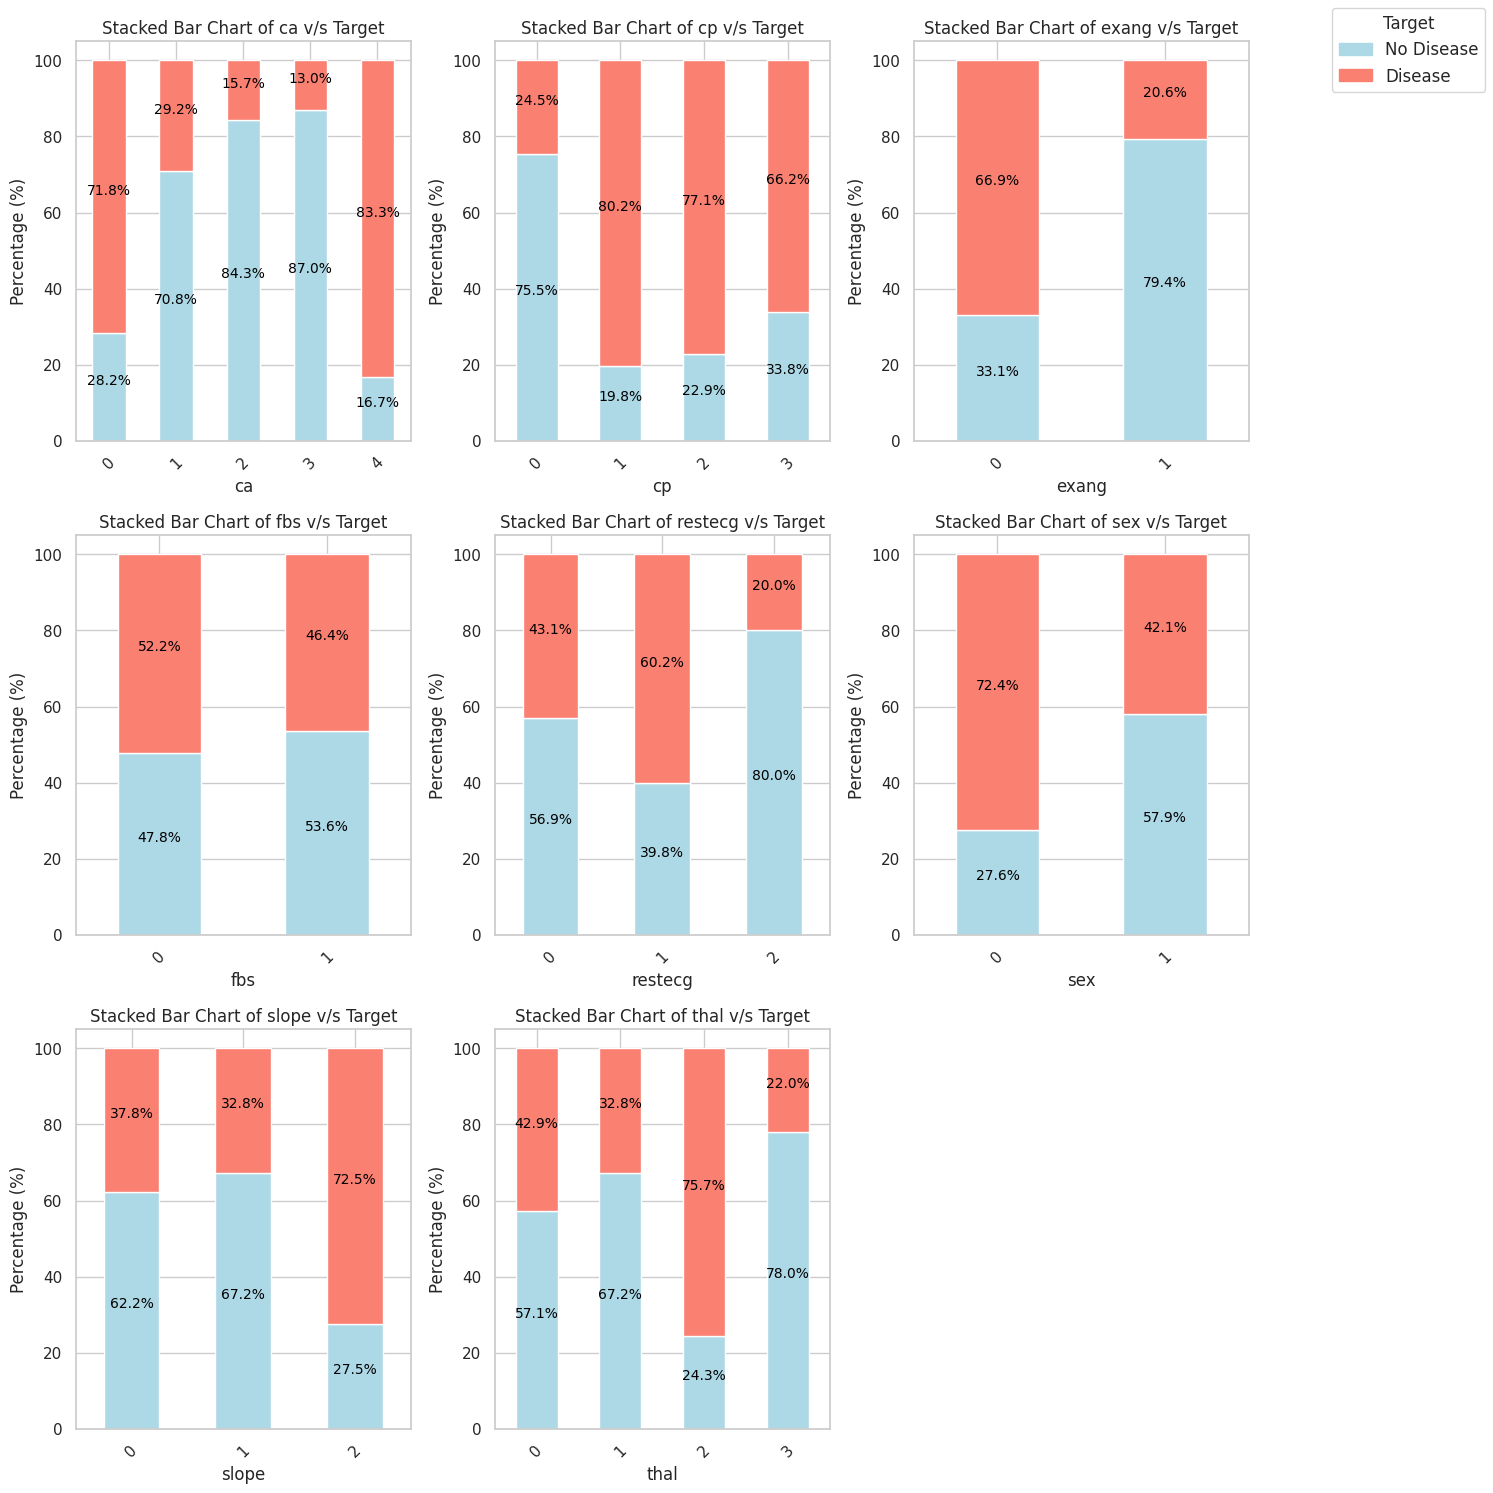

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['ca', 'cp', 'exang', 'fbs', 'restecg', 'sex', 'slope', 'thal']

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

for i, column in enumerate(categorical_columns):
    # Calculate counts of each category for both target values
    count_data = df.groupby([column, 'target']).size().unstack(fill_value=0)

    # Calculate percentages
    percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

    # Plotting
    ax = axes[i]
    percentage_data.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'salmon'])

    ax.set_title(f'Stacked Bar Chart of {column} v/s Target')
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage (%)')
    ax.set_xticks(range(len(percentage_data)))
    ax.set_xticklabels(percentage_data.index, rotation=45)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate if the height is greater than zero
            ax.annotate(f'{height:.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_y() + height / 2),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

    ax.legend_.remove()  # Remove the legend for individual subplots

# Create a single legend for the entire figure
handles = [plt.Rectangle((0, 0), 1, 1, color='lightblue'), plt.Rectangle((0, 0), 1, 1, color='salmon')]
fig.legend(handles, ['No Disease', 'Disease'], title='Target', loc='upper right', fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin to fit the legend
plt.show()


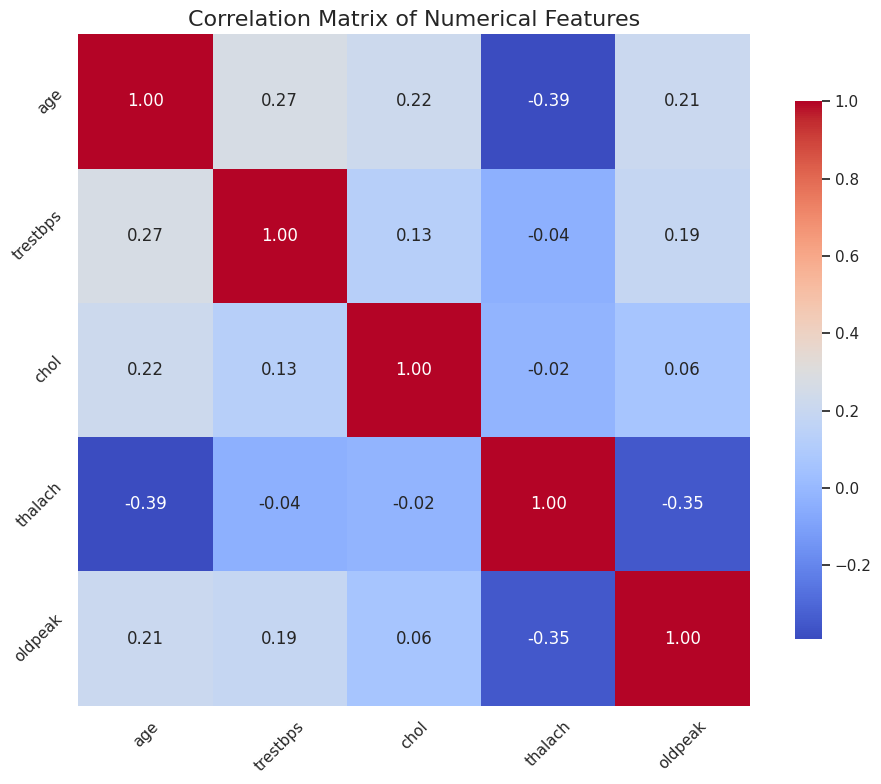

In [ ]:
correlation_matrix = df[numeric_columns].corr()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Adding titles and labels
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


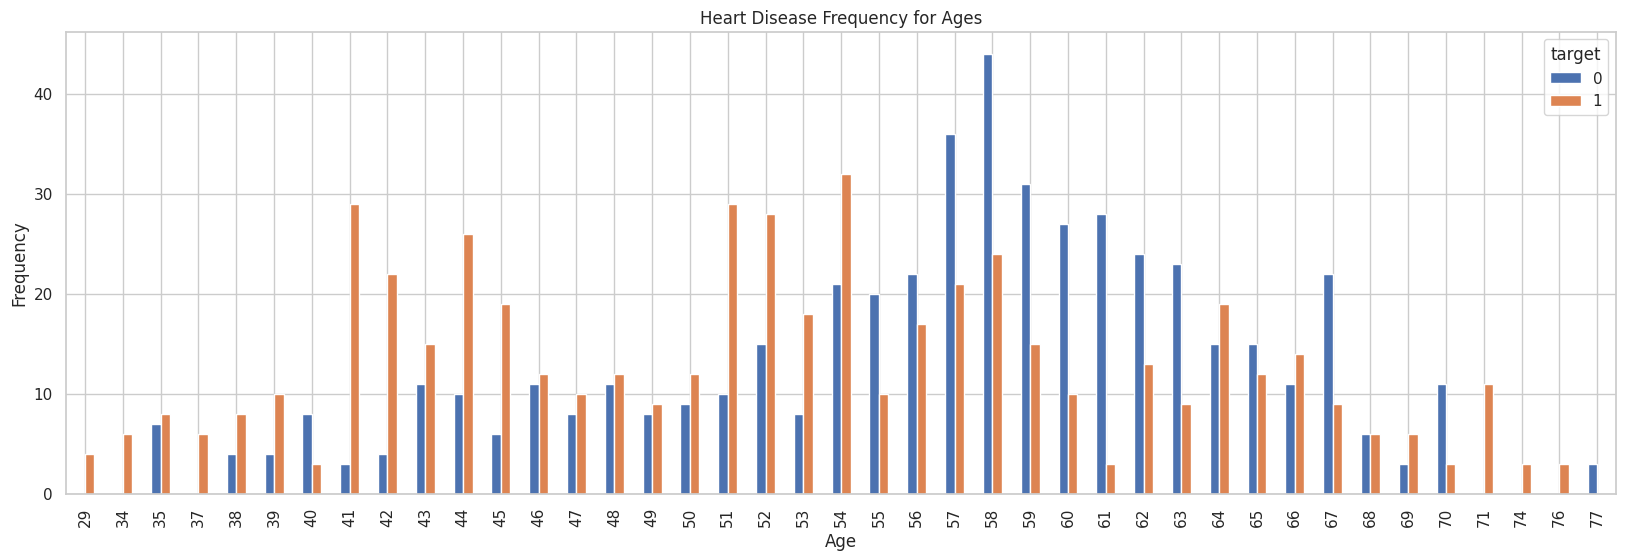

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

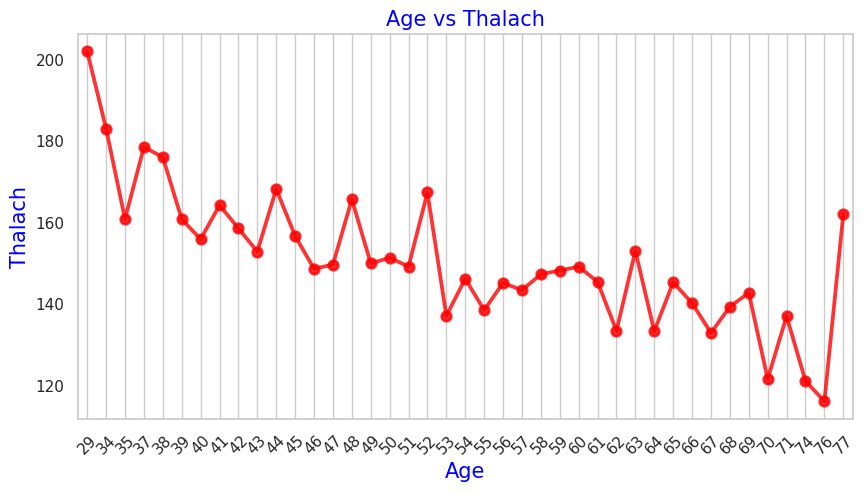

In [ ]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

# Feature Selection

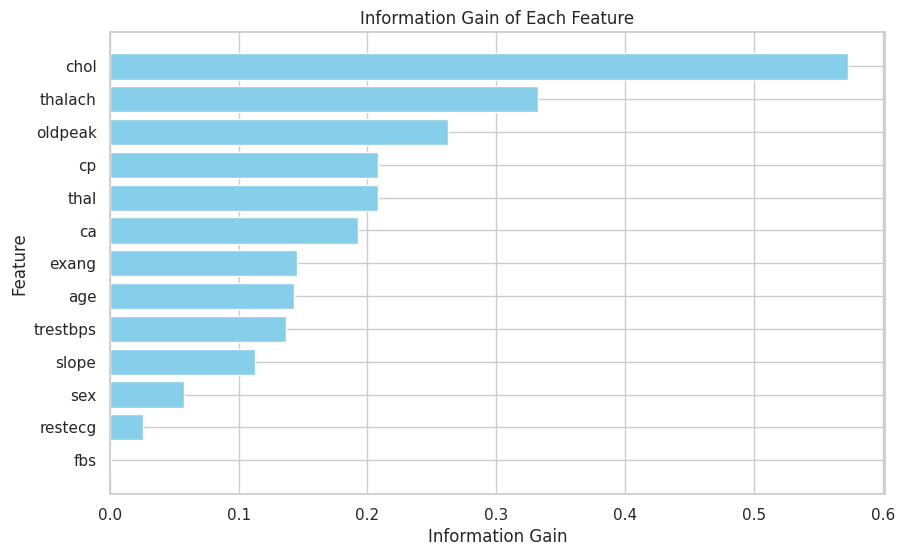

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt

target_col = 'target'
features = df.columns[df.columns != target_col]

# Function to calculate entropy
def entropy(series):
    probabilities = series.value_counts(normalize=True)
    return -sum(probabilities * np.log2(probabilities))

# Function to calculate information gain for a given feature
def information_gain(df, feature, target):
    # Entropy of the target
    target_entropy = entropy(df[target])

    # Conditional entropy for the feature
    feature_entropy = 0
    for value in df[feature].unique():
        subset = df[df[feature] == value]
        weight = len(subset) / len(df)
        feature_entropy += weight * entropy(subset[target])

    # Information gain
    return target_entropy - feature_entropy

# Calculate information gain for each feature
info_gain = {feature: information_gain(df, feature, target_col) for feature in features}

info_gain_df = pd.DataFrame(info_gain.items(), columns=['Feature', 'Information Gain'])

info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Plot the information gain
plt.figure(figsize=(10, 6))
plt.barh(info_gain_df['Feature'], info_gain_df['Information Gain'], color='skyblue')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.title('Information Gain of Each Feature')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target column
df[target_col] = le.fit_transform(df[target_col])

# You can check the mapping of labels to numeric values
print(dict(zip(le.classes_, le.transform(le.classes_))))


{0: 0, 1: 1}


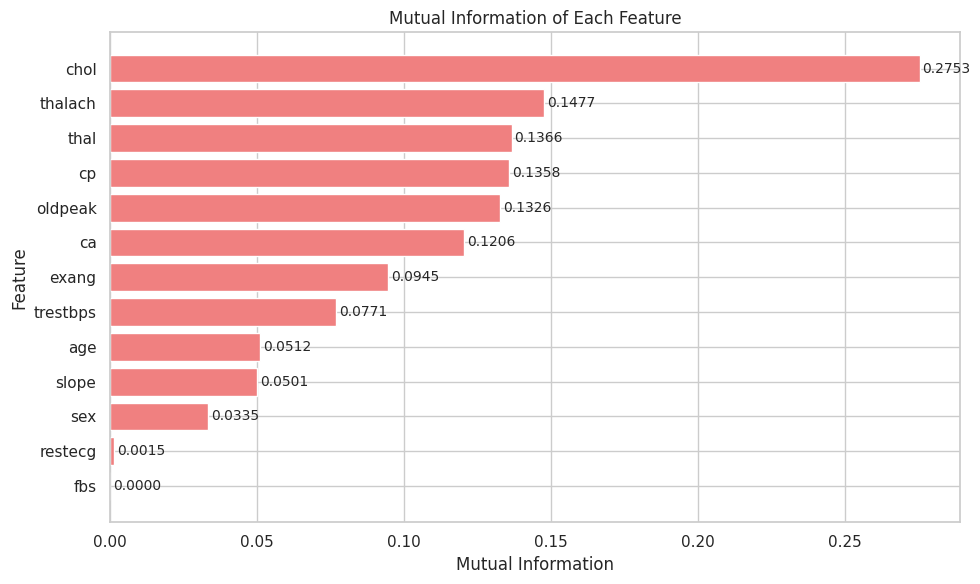

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

target_col = 'target'

features = df.columns[df.columns != target_col]

X = df[features]
y = df[target_col]

mutual_info = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_df = pd.DataFrame({'Feature': features, 'Mutual Information': mutual_info})

mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='lightcoral')

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}',
             va='center', ha='left', fontsize=10)

plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title('Mutual Information of Each Feature')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


<ipython-input-29-621f513924e8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-29-621f513924e8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-29-621f513924e8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

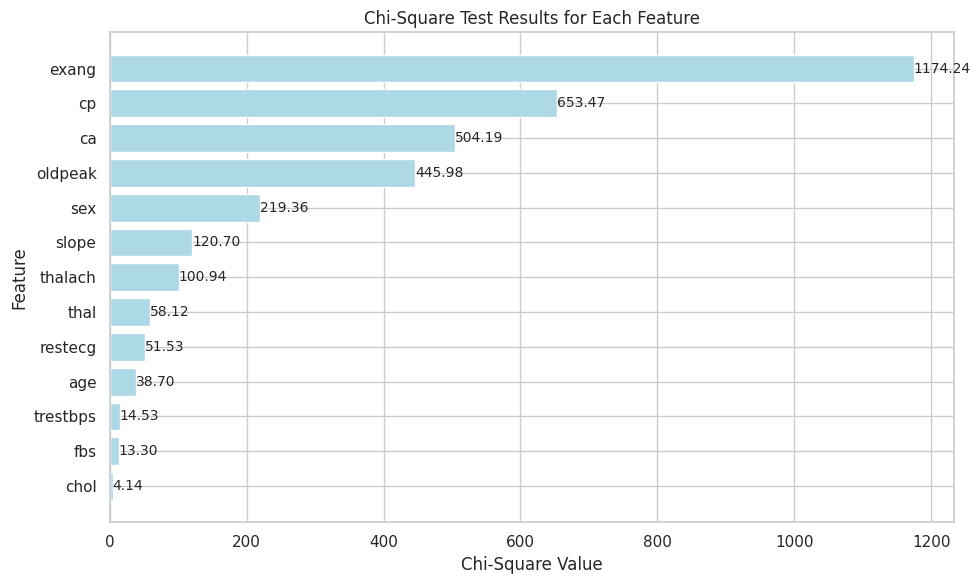

     Feature  Chi-Square Value        p-Value
8      exang       1174.238345  2.421453e-257
2         cp        653.471765  3.927116e-144
11        ca        504.185640  1.167527e-111
9    oldpeak        445.984489   5.395237e-99
1        sex        219.362851   1.245555e-49
10     slope        120.702922   4.438623e-28
7    thalach        100.940465   9.479012e-24
12      thal         58.120394   2.465570e-14
6    restecg         51.531326   7.046373e-13
0        age         38.697488   4.948455e-10
3   trestbps         14.527731   1.381115e-04
5        fbs         13.297947   2.656969e-04
4       chol          4.140226   4.187559e-02


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer

target_col = 'target'

# List of all features (excluding the target)
features = df.columns[df.columns != target_col]

# Separate features and target
X = df[features]
y = df[target_col]

# If necessary, encode categorical variables numerically
label_encoders = {}
for column in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# If there are numerical features, bin them to make them discrete (required for chi2)
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X[numerical_features] = kbins.fit_transform(X[numerical_features])

# Calculate Chi-Square statistics and p-values
chi2_values, p_values = chi2(X, y)
chi2_df = pd.DataFrame({'Feature': features, 'Chi-Square Value': chi2_values, 'p-Value': p_values})

# Sort by Chi-Square value
chi2_df = chi2_df.sort_values(by='Chi-Square Value', ascending=False)

# Plot the Chi-Square values
plt.figure(figsize=(10, 6))
bars = plt.barh(chi2_df['Feature'], chi2_df['Chi-Square Value'], color='lightblue')

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)
plt.xlabel('Chi-Square Value')
plt.ylabel('Feature')
plt.title('Chi-Square Test Results for Each Feature')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

print(chi2_df)


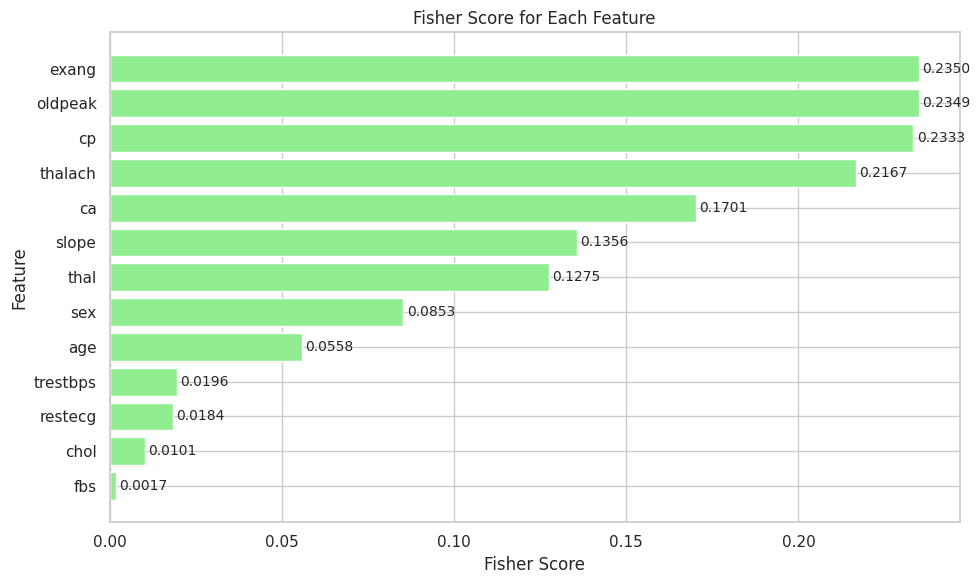

     Feature  Fisher Score
8      exang      0.235040
9    oldpeak      0.234867
2         cp      0.233314
7    thalach      0.216717
11        ca      0.170093
10     slope      0.135617
12      thal      0.127535
1        sex      0.085283
0        age      0.055762
3   trestbps      0.019551
6    restecg      0.018365
4       chol      0.010106
5        fbs      0.001693


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

target_col = 'target'
features = df.columns[df.columns != target_col]

X = df[features]
y = df[target_col]

def fisher_score(X, y):
    unique_classes = np.unique(y)
    if len(unique_classes) != 2:
        raise ValueError("Fisher's score is only applicable for binary classification.")

    fisher_scores = []

    for column in X.columns:
        # Mean and variance for each class
        mean_0 = X[y == unique_classes[0]][column].mean()
        mean_1 = X[y == unique_classes[1]][column].mean()
        var_0 = X[y == unique_classes[0]][column].var()
        var_1 = X[y == unique_classes[1]][column].var()

        # Overall mean
        mean_total = X[column].mean()

        # Between-class variance
        numerator = (mean_0 - mean_total)**2 + (mean_1 - mean_total)**2

        # Within-class variance
        denominator = var_0 + var_1

        # Fisher score calculation
        fisher_score = numerator / denominator if denominator != 0 else 0
        fisher_scores.append(fisher_score)

    return np.array(fisher_scores)

fisher_scores = fisher_score(X, y)

fisher_df = pd.DataFrame({'Feature': features, 'Fisher Score': fisher_scores})

fisher_df = fisher_df.sort_values(by='Fisher Score', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(fisher_df['Feature'], fisher_df['Fisher Score'], color='lightgreen')

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}',
             va='center', ha='left', fontsize=10)

plt.xlabel('Fisher Score')
plt.ylabel('Feature')
plt.title('Fisher Score for Each Feature')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

print(fisher_df)


Selected Features: chol, oldpeak, ca, thalach, exang, cp, thal, slope(tentative)


In [ ]:
selected_features = ['chol', 'oldpeak', 'ca', 'thalach', 'exang', 'cp', 'thal','slope','target']

# Create a new DataFrame with the selected features
df_reduced = df[selected_features]

print(df_reduced.head())


   chol  oldpeak ca  thalach exang cp thal slope  target
0   212      1.0  2      168     0  0    3     2       0
1   203      3.1  0      155     1  0    3     0       0
2   174      2.6  0      125     1  0    3     0       0
3   203      0.0  1      161     0  0    3     2       0
4   294      1.9  3      106     0  0    2     1       0


<a class="anchor" id="2."></a>
# Model Creation



## Preprocessing

In [ ]:
data=df

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in ['sex','fbs','restecg','slope','ca', 'exang', 'cp', 'thal']:
    data[col] = le.fit_transform(data[col])

# Check the updated DataFrame
print(data.head())
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select continuous features to normalize
continuous_features = ['chol', 'oldpeak', 'thalach','age','trestbps']  # Add other continuous features if necessary

# Normalize the continuous features
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Check the updated DataFrame
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167    1   0  0.292453  0.196347    0        1  0.740458      0   
1  0.500000    1   0  0.433962  0.175799    1        0  0.641221      1   
2  0.854167    1   0  0.481132  0.109589    0        1  0.412214      1   
3  0.666667    1   0  0.509434  0.175799    0        1  0.687023      0   
4  0.6

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 112.2 KB


In [ ]:
selected_features = ['chol', 'oldpeak', 'ca', 'thalach', 'exang', 'cp', 'thal','target']

data_reduced = data[selected_features]

print(data_reduced.head())

       chol   oldpeak  ca   thalach  exang  cp  thal  target
0  0.196347  0.161290   2  0.740458      0   0     3       0
1  0.175799  0.500000   0  0.641221      1   0     3       0
2  0.109589  0.419355   0  0.412214      1   0     3       0
3  0.175799  0.000000   1  0.687023      0   0     3       0
4  0.383562  0.306452   3  0.267176      0   0     2       0


## Model Training

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model(ip):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=ip, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

### Model 1(Main Model)

In [ ]:
X = data.drop(['target'], axis=1)
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assume X has both numerical and categorical columns
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from keras.utils import to_categorical

# Assuming y_train and y_test are your target arrays
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")


y_train_encoded shape: (717, 2)
y_test_encoded shape: (308, 2)


In [ ]:
X_train.shape

(717, 13)

In [ ]:
model = create_model(13)

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 290 (1.13 KB)

 Trainable params: 290 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Fit the model with the one-hot encoded targets
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6267 - loss: 0.6878 - val_accuracy: 0.7955 - val_loss: 0.6698
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 0.6635 - val_accuracy: 0.7890 - val_loss: 0.6433
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7217 - loss: 0.6399 - val_accuracy: 0.7922 - val_loss: 0.6117
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7585 - loss: 0.6152 - val_accuracy: 0.7890 - val_loss: 0.5780
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7642 - loss: 0.5783 - val_accuracy: 0.8019 - val_loss: 0.5447
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7566 - loss: 0.5555 - val_accuracy: 0.8019 - val_loss: 0.5130
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8107 - loss: 0.5189 - val_accuracy: 0.8019 - val_loss: 0.4847
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7546 - loss: 0.5049 - val_accuracy: 0.8084 - 

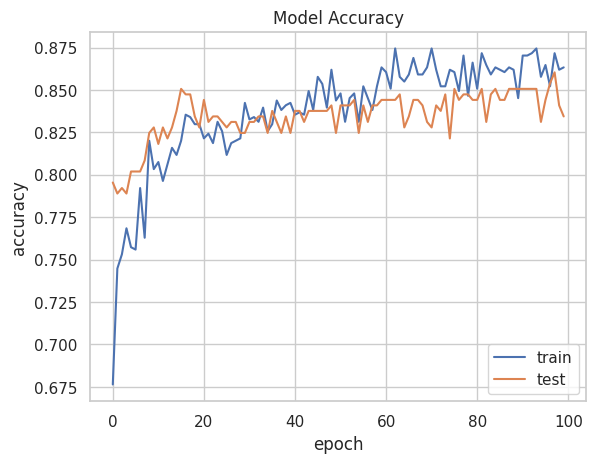

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

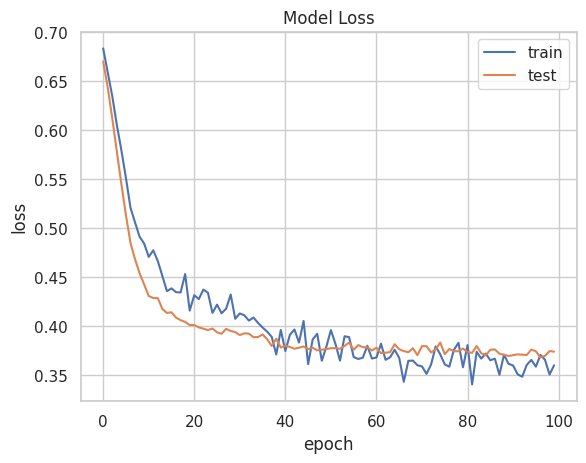

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results for Categorical Model
0.8344155844155844
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       159
           1       0.78      0.92      0.84       149

    accuracy                           0.83       308
   macro avg       0.84      0.84      0.83       308
weighted avg       0.85      0.83      0.83       308



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

categorical_pred_train = np.argmax(model.predict(X_train), axis=1)
print('Training Confusion Matrix:')
print(confusion_matrix(y_train, categorical_pred_train))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training Confusion Matrix:
[[281  59]
 [ 25 352]]


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

categorical_pred_test = np.argmax(model.predict(X_test), axis=1)
print('Training Confusion Matrix:')
print(confusion_matrix(y_test, categorical_pred_test))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training Confusion Matrix:
[[120  39]
 [ 12 137]]


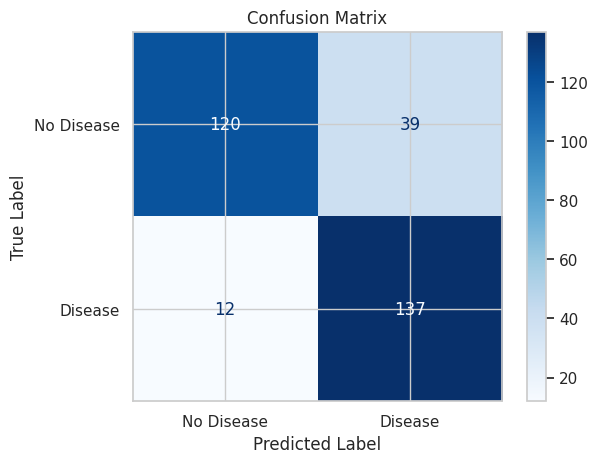

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, categorical_pred_test)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)

# Add title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()


### Model 2

In [ ]:
X = data_reduced.drop(['target'], axis=1)
y = data_reduced['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
data_reduced.shape

(1025, 8)

In [ ]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
model = create_model(7)

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242 (968.00 B)

 Trainable params: 242 (968.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6338 - loss: 0.6903 - val_accuracy: 0.7857 - val_loss: 0.6779
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7649 - loss: 0.6736 - val_accuracy: 0.7727 - val_loss: 0.6545
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7666 - loss: 0.6493 - val_accuracy: 0.7695 - val_loss: 0.6238
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7682 - loss: 0.6219 - val_accuracy: 0.7597 - val_loss: 0.5922
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7434 - loss: 0.6015 - val_accuracy: 0.7695 - val_loss: 0.5615
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7569 - loss: 0.5793 - val_accuracy: 0.7695 - val_loss: 0.5334
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7633 - loss: 0.5524 - val_accuracy: 0.7695 - val_loss: 0.5103
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7754 - loss: 0.5493 - val_accuracy: 0.7955 -

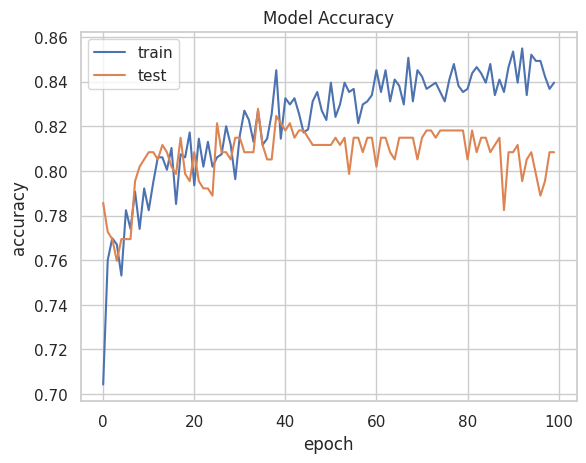

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

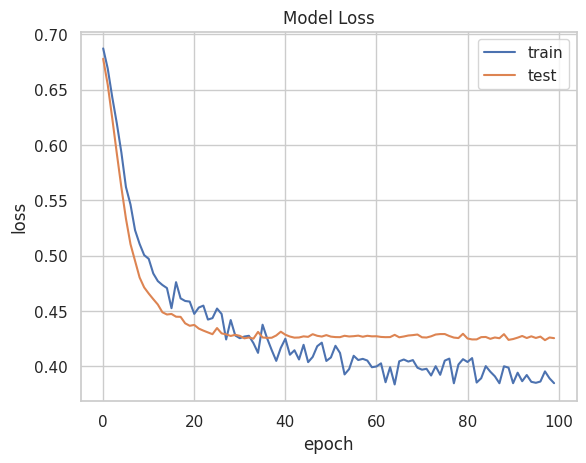

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Results for Categorical Model
0.8084415584415584
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.82       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

categorical_pred_test = np.argmax(model.predict(X_test), axis=1)
print('Training Confusion Matrix:')
print(confusion_matrix(y_test, categorical_pred_test))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training Confusion Matrix:
[[119  40]
 [ 19 130]]


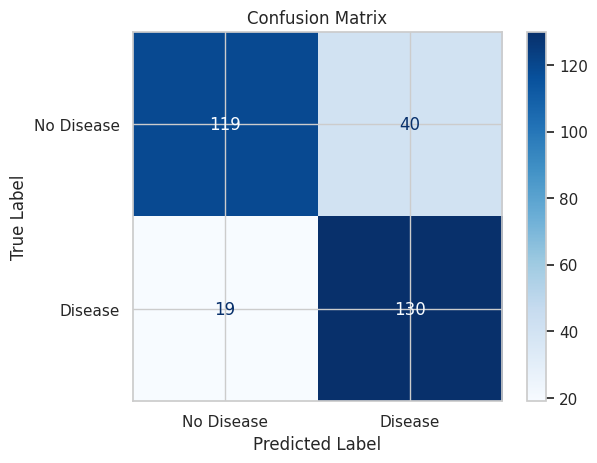

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, categorical_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])

disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()